# Trabalho Prático 10 - Autômatos Celulares
### Caio Guedes de Azevedo Mota - 2018054990
### Gabriel Victor Carvalho Rocha - 2018054907
### Guilherme Bezerra dos Santos - 2018055040
### Lucas Mariani Paiva Caldeira Brant - 2018054826

In [25]:
from matplotlib import colors
import numpy as np
import matplotlib.pyplot as plt
from random import randint, uniform

In [26]:
#CONSTANTES
L = 100
N = L * L
ITER = 100
PLOTS = 5
SIMS = 10

INFECTADO = -1
SUSCETIVEL = 0
RECUPERADO = 1

# PROBABILIDADES
PROB = {
    0: { "CONT": 0.7, "REC": 0.15 },
    1: { "CONT": 0.5, "REC": 0.3 },
    2: { "CONT": 0.95, "REC": 0.05 }
}

# CORES
COR_INFECTADO = [255, 90, 95]
COR_SUSCETIVEL = [230, 230, 230]
COR_RECUPERADO = [139, 255, 133]

In [27]:
def estado_inicial(N):    
    pessoas = np.zeros(N, dtype=np.int16)
    for i in range(N):
        pessoas[i] = 0

    infectado = randint(0, N - 1)
    pessoas[infectado] = -1
    return pessoas

In [28]:
def gera_vizinhos(L, N):
    viz = np.zeros((N, 4), dtype = np.int16)
    for k in range(N):
        viz[k, 0] = k + 1
        if (k + 1) % L == 0: viz[k, 0] = k + 1 - L
        viz[k, 1] = k + L
        if k > (N - L - 1): viz[k, 1] = k + L - N
        viz[k, 2] = k - 1
        if k % L == 0: viz[k, 2] = k + L - 1
        viz[k, 3] = k - L
        if k < L: viz[k, 3] = k + N - L
    return viz

In [29]:
def atualizar_estado(vizinhos, pessoas, p_infec, p_rec):
    infectados = [i for i, pessoa in enumerate(pessoas) if pessoa == INFECTADO]

    for infectado in infectados:
        if uniform(0, 1) <= p_rec: 
            pessoas[infectado] = RECUPERADO
            continue

        for vizinho in vizinhos[infectado]:
            if uniform(0, 1) <= p_infec and pessoas[vizinho] == SUSCETIVEL:
                pessoas[vizinho] = INFECTADO

    infectados = [i for i, pessoa in enumerate(pessoas) if pessoa == INFECTADO]
    suscetiveis = [i for i, pessoa in enumerate(pessoas) if pessoa == SUSCETIVEL]
    recuperados = [i for i, pessoa in enumerate(pessoas) if pessoa == RECUPERADO]

    return pessoas, (len(infectados), len(suscetiveis), len(recuperados))

In [30]:
def simular(N, L, p_config, iter = ITER, plots = PLOTS, plotar=False):
    pessoas = estado_inicial(N)
    vizinhos = gera_vizinhos(L, N)
    dados = []
    plot_step = iter/plots
    count = 0
    p_infec = PROB[p_config]["CONT"]
    p_rec = PROB[p_config]["REC"]
    for i in range(iter):
        pessoas, v = atualizar_estado(vizinhos, pessoas, p_infec, p_rec)
        dados.append((v[0], v[1], v[2]))
        count += 1
        if count % plot_step == 0 and plotar == True:
            distribuicao_espacial(pessoas, L)
    return dados

In [31]:
def get_matriz(vetor, L):
    m = np.array(vetor)
    return np.reshape(m, (L, L))

In [32]:
def get_matriz_img(m, L):
    img = np.zeros((L,L,3))
    for i, line in enumerate(m):
        for j, _ in enumerate(line):
            if m[i][j] == INFECTADO:
                img[i][j] = np.array(COR_INFECTADO)
            elif m[i][j] == RECUPERADO:
                img[i][j] = np.array(COR_RECUPERADO)
            else: img[i][j] = np.array(COR_SUSCETIVEL)
    return img

In [33]:
def distribuicao_espacial(pessoas, L):
    matriz = get_matriz(pessoas, L)
    img = get_matriz_img(matriz, L)

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(img.astype(np.uint8), interpolation='nearest')
    ax.grid(which='major', axis='both', color='white', linewidth=1.5)
    ax.set_xticks(np.arange(-.5, L, 1))
    ax.set_yticks(np.arange(-.5, L, 1))
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    plt.show()

In [45]:
def plot_media(p_config, sim_count = SIMS):
    dados = []
    for i in range(sim_count):
        dados.append(simular(N, L, p_config))
    
    avg_infec, avg_sus, avg_rec = [], [], []

    for t in range(len(dados[0])):
        infec, sus, rec = 0,0,0
        for sim in range(sim_count):
            infec += dados[sim][t][0]
            sus += dados[sim][t][1]
            rec += dados[sim][t][2]
        avg_infec.append(infec/sim_count)
        avg_sus.append(sus/sim_count)
        avg_rec.append(rec/sim_count)
    
    # return avg_infec, avg_sus, avg_rec
    plt.figure(figsize=(10, 8))
    plt.plot(avg_infec, color='r', label='Infectados')
    plt.plot(avg_sus, color='purple', label="Suscetíveis")
    plt.plot(avg_rec, color='g', label="Recuperados")
    plt.legend()
    plt.show()

## Distribuição espacial da população para o conjunto de probabilidade 0

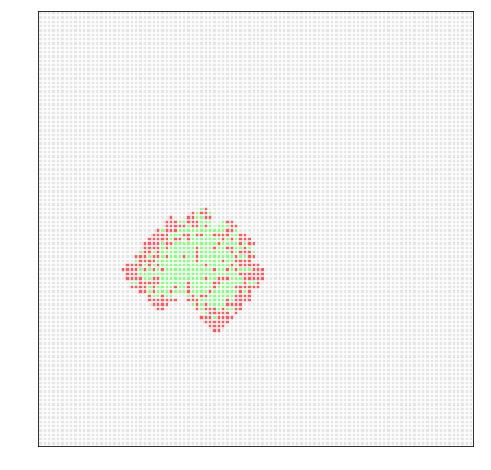

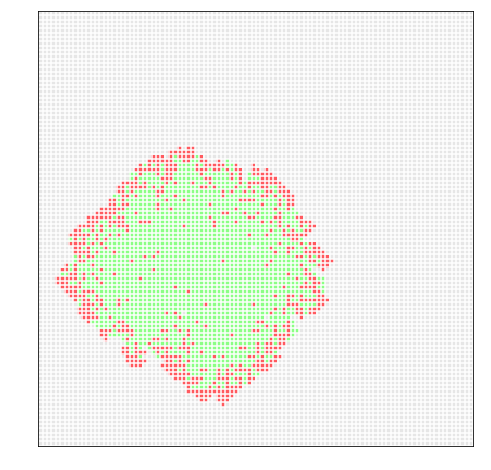

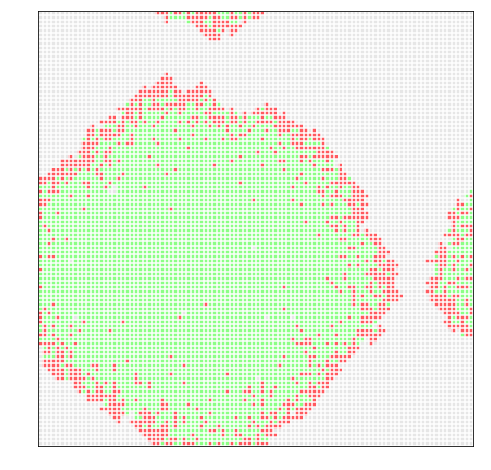

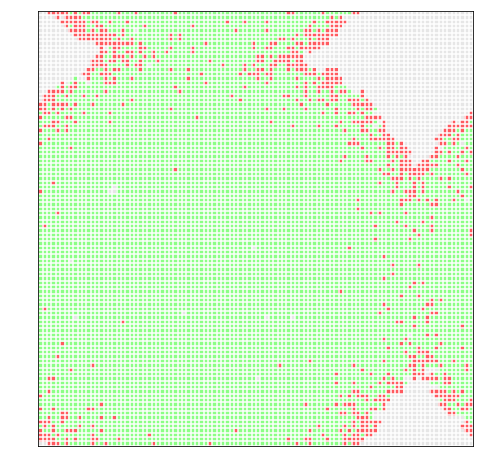

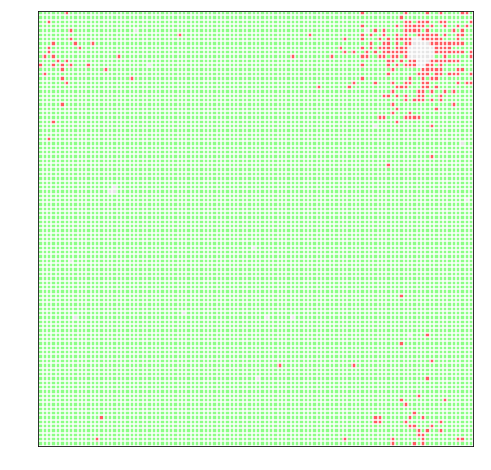

In [37]:
dados = simular(N, L, 0, plotar=True)

## Distribuição espacial da população para o conjunto de probabilidade 1

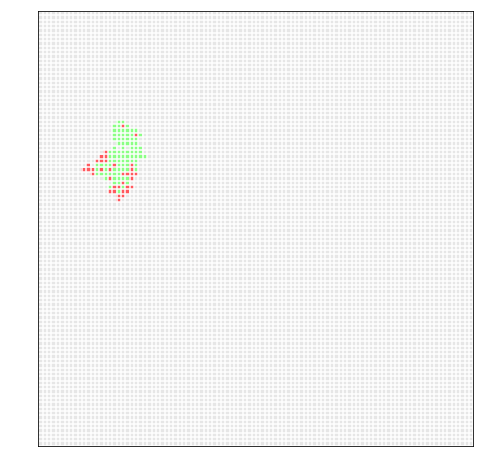

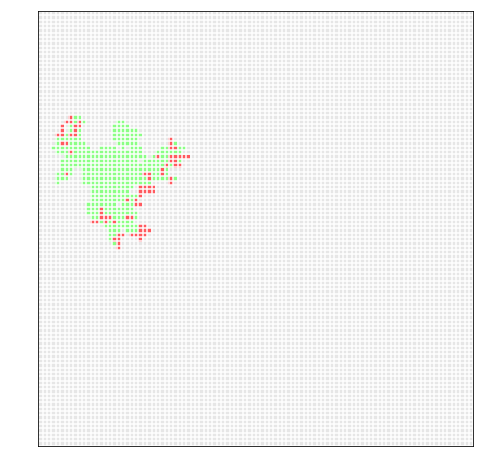

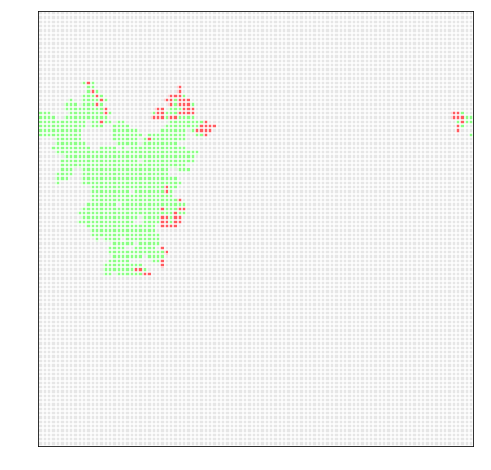

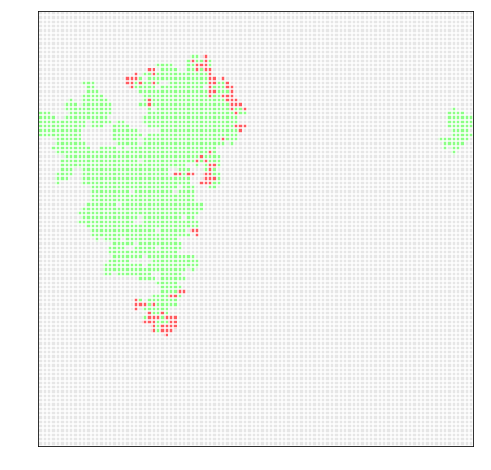

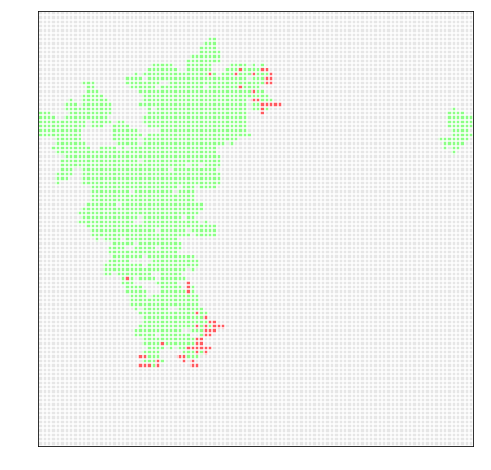

In [40]:
dados = simular(N, L, 1, plotar=True)

## Distribuição espacial da população para o conjunto de probabilidade 2

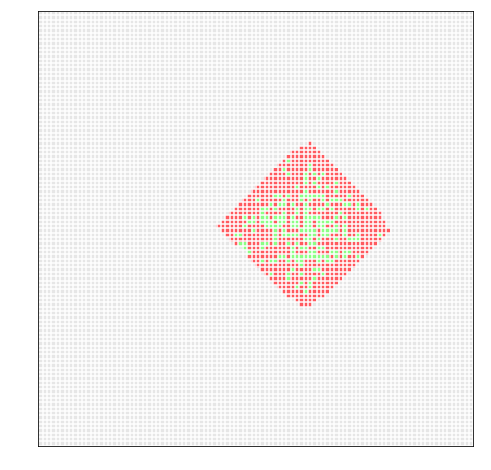

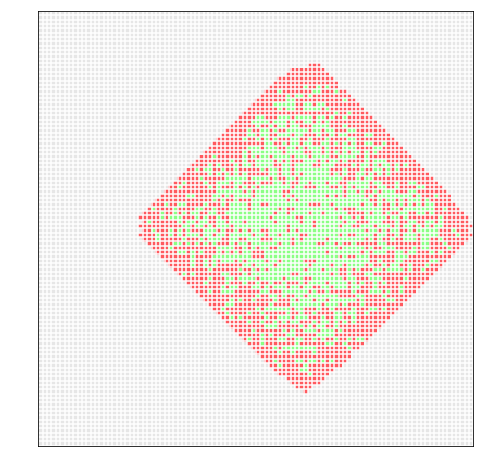

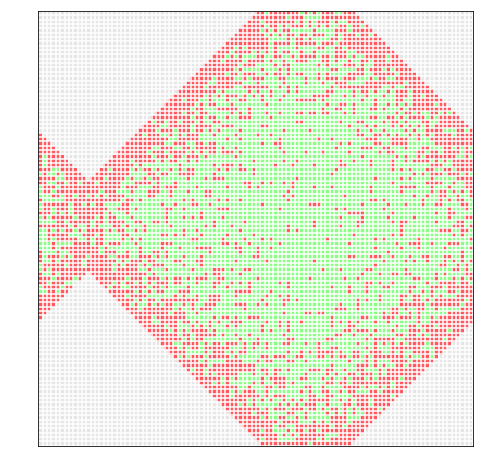

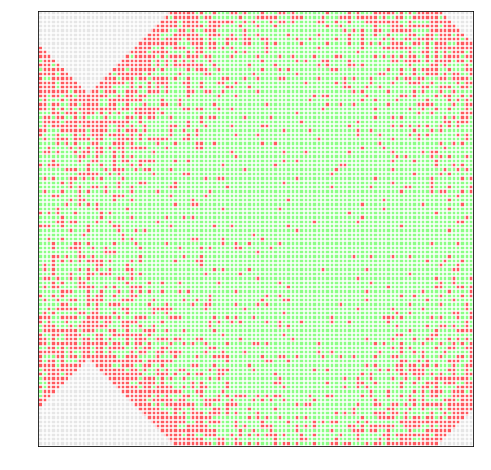

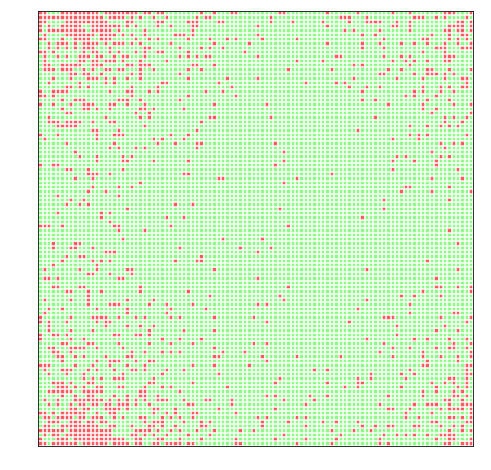

In [41]:
dados = simular(N, L, 2, plotar=True)

## População média por tempo para o conjunto de probabilidade 0

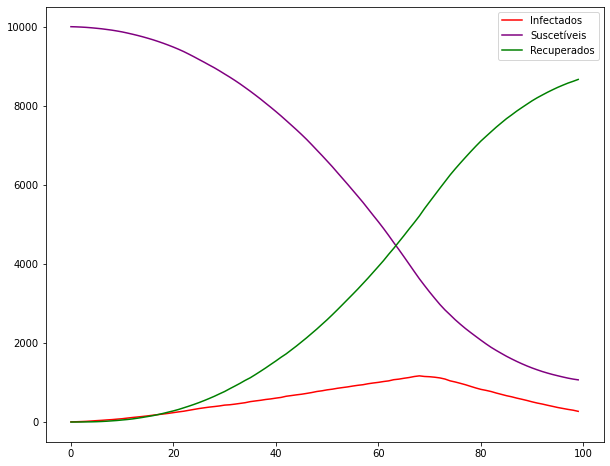

In [46]:
plot_media(0)

## População média por tempo para o conjunto de probabilidade 1

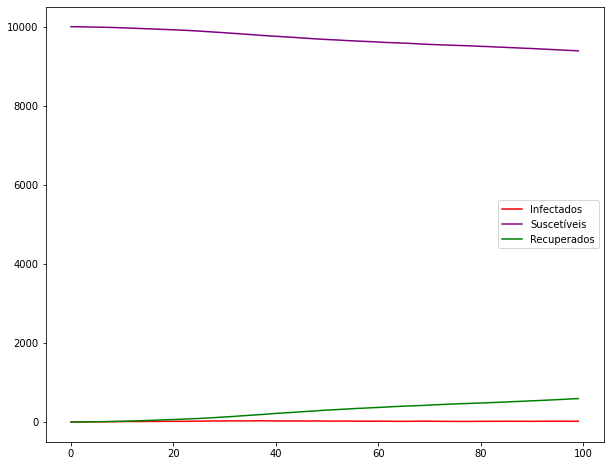

In [49]:
plot_media(1)

## População média por tempo para o conjunto de probabilidade 2

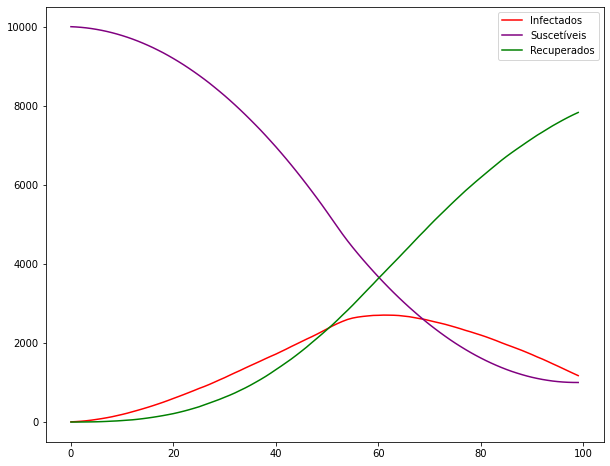

In [48]:
plot_media(2)